In [ ]:
"""
Analysis of U.S. Suicide Rates

Jaime Lu and Rohit Varadhan

Intro + Context here (I have it on a doc)

"""

In [57]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
'''After downloading the data and storing it in the same folder as your Jupyter file, we will read in the data.'''
#load the data
data = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")

'''We are going to clean up some unneccessary columns for better visualization of what the data looks like. This is also important for what we will do later'''
#Clean the data
data.drop(data[(data['UNIT_NUM'] == 0) | (data['UNIT_NUM'] == 1) | (data['YEAR'] < 1950)].index, inplace=True)
data.drop(columns=['INDICATOR', 'FLAG', 'UNIT', 'STUB_NAME_NUM', 'YEAR_NUM', 'UNIT_NUM'], inplace=True)

# Extract sex information from 'STUB_LABEL'
data['SEX'] = data['STUB_LABEL'].apply(lambda x: 'Male' if 'Male' in x else ('Female' if 'Female' in x else 'All'))

# Filter data for men and women
men_data = data[data['SEX'] == 'Male'].copy()
women_data = data[data['SEX'] == 'Female'].copy()

# Remove rows with NaN values in the 'ESTIMATE' column
men_data.dropna(subset=['ESTIMATE'], inplace=True)
women_data.dropna(subset=['ESTIMATE'], inplace=True)

data.head(19)

,STUB_NAME,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,AGE_NUM,ESTIMATE,SEX
698,Total,All persons,0.0,1980,All ages,0.0,11.9,All
728,Total,All persons,0.0,1981,All ages,0.0,12.0,All
814,Total,All persons,0.0,1950,All ages,0.0,11.4,All
815,Total,All persons,0.0,1960,All ages,0.0,10.6,All
816,Total,All persons,0.0,1970,All ages,0.0,11.6,All
817,Total,All persons,0.0,1982,All ages,0.0,12.2,All
818,Total,All persons,0.0,1983,All ages,0.0,12.1,All
819,Total,All persons,0.0,1984,All ages,0.0,12.4,All
820,Total,All persons,0.0,1985,All ages,0.0,12.4,All
821,Total,All persons,0.0,1986,All ages,0.0,12.9,All


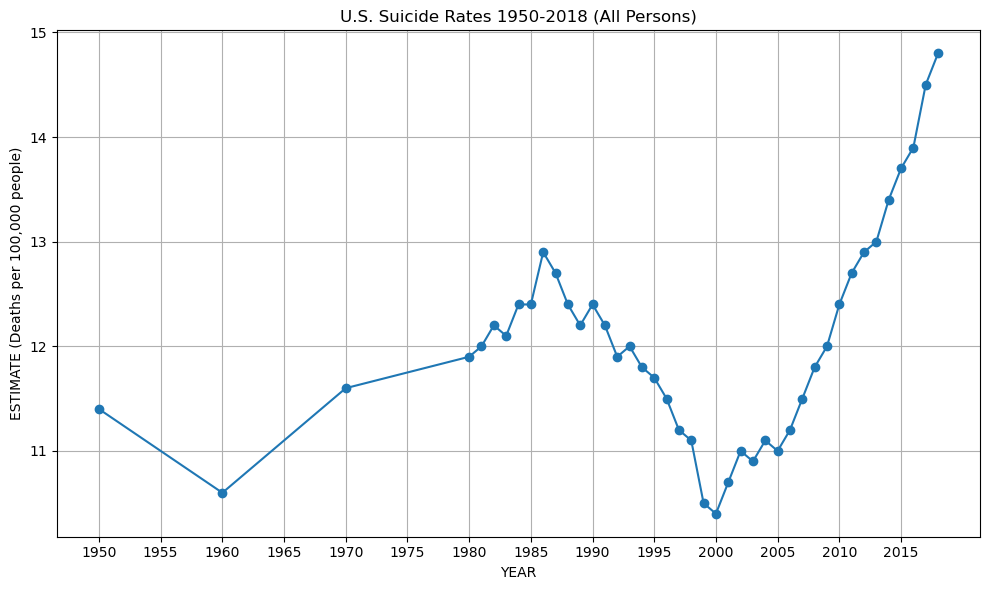

In [60]:
# Our first data visualization: Estimate vs Year for the 'All Persons' demographic category so we can get a general sense of the suicide rates
all_persons_data = data[data['STUB_LABEL'] == 'All persons'].copy()

all_persons_data.sort_values(by='YEAR', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(all_persons_data['YEAR'], all_persons_data['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1950-2018 (All Persons)')

plt.xticks(range(min(all_persons_data['YEAR']),max(all_persons_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

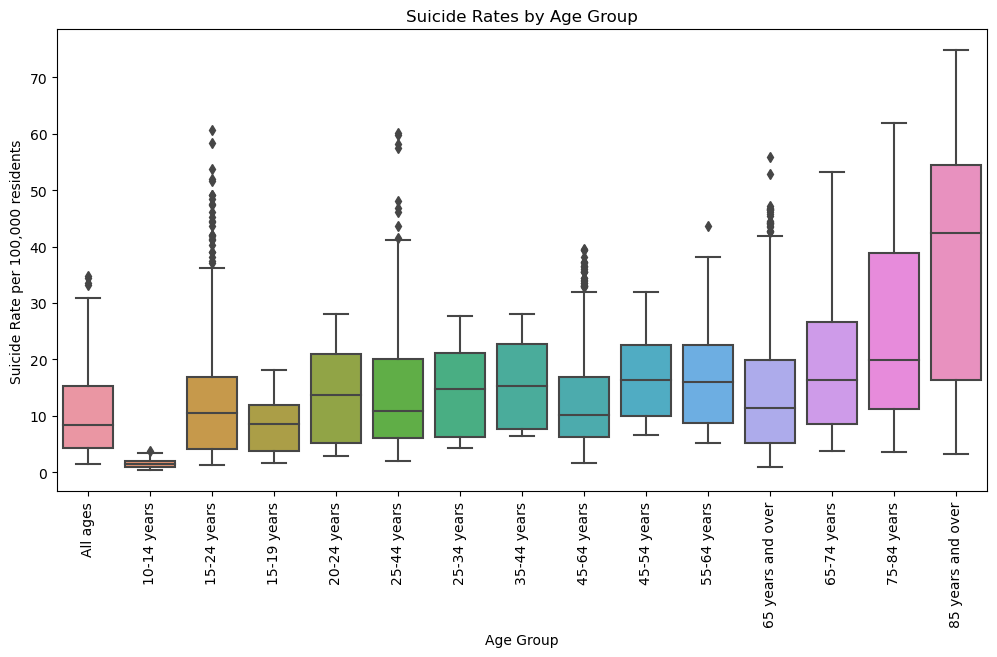

In [22]:
'''
Hmm, looks interesting enough, but this alone does not give us much to work with.
Maybe mention missing data from 1950 to 1980 if we choose to go down this route
Let's now visualize suicide rates (Estimate) by age group with a box plot.
'''

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='AGE', y='ESTIMATE')
plt.title('Suicide Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate per 100,000 residents')
plt.xticks(rotation=90)
plt.show()


In [23]:
'''
As you can see in the above box plot, it seems that across all years, suicide rates seem to increase the older the
age group is. There is also a very clear rise in rates at the final "85 and older" age group, in which the mean
suicide rate sits at over 40 per 100,000 individuals, which is more than double the suicide rate of the previous
group, "75-84 years".
'''

'\nAs you can see in the above box plot, it seems that across all years, suicide rates seem to increase the older the\nage group is. There is also a very clear rise in rates at the final "85 and older" age group, in which the mean\nsuicide rate sits at over 40 per 100,000 individuals, which is more than double the suicide rate of the previous\ngroup, "75-84 years".\n'

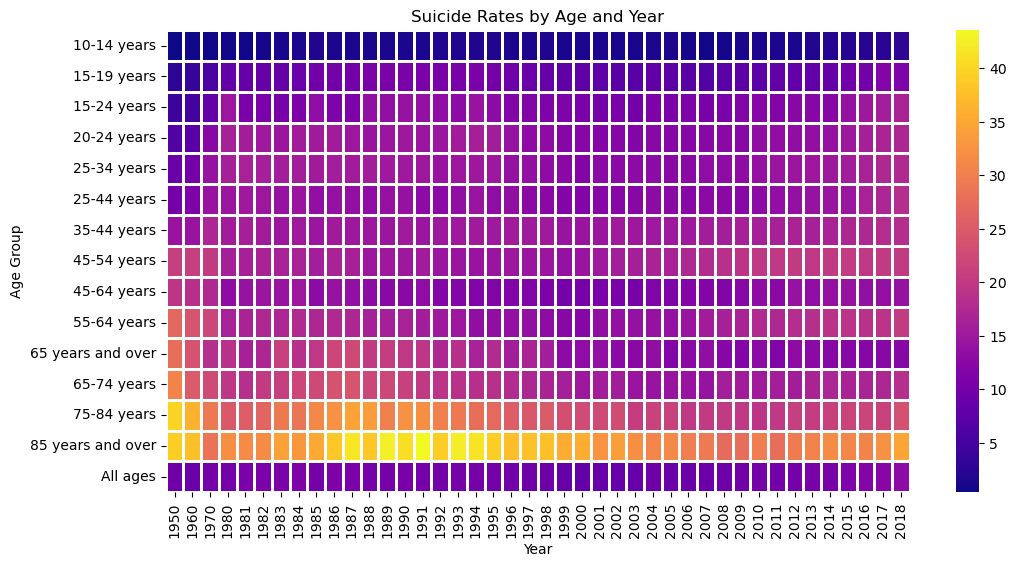

In [24]:
'''
Looking at age groups we can start to notice that age could be a strong factor for suicide rate.
Let's combine age and year using a heatmap to look at 2 attributes of the Suicide Rates from 1950 to 2018.
'''

pivot_table = data.pivot_table(values='ESTIMATE', index='AGE', columns='YEAR', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='plasma', linecolor='white', linewidths=1)
plt.title('Suicide Rates by Age and Year')
plt.xlabel('Year')
plt.ylabel('Age Group')
plt.show()

In [ ]:
'''
As you can see in the above heat map, it once again shows how apparently high the suicide rate is for the "85 and
older" age group, glowing a bright yellow for all years. what is more important to note through this map, however,
is the noticable rise in suicide rates for younger age groups since the 1990's. This rise can mainly be seen 
consistently across groups of "15-24 years" up to "45-54 years", which is could be evident of many factors and 
events throughout the years, including economic factors such as the stock market crash of 2008, as well as social
factors such as the rise of social media and the internet in the early 2000's, which would mainly affect younger
people. While these are all possibilities, it is impossible to know the direct cause of the increase through 
this data alone.
'''

In [ ]:
'''
Now that we've analyzed suicide rates based on age, let's now look at the effect of dividing the data based on sex.

Firstly, we will visualize the suicide rates of men over time
'''

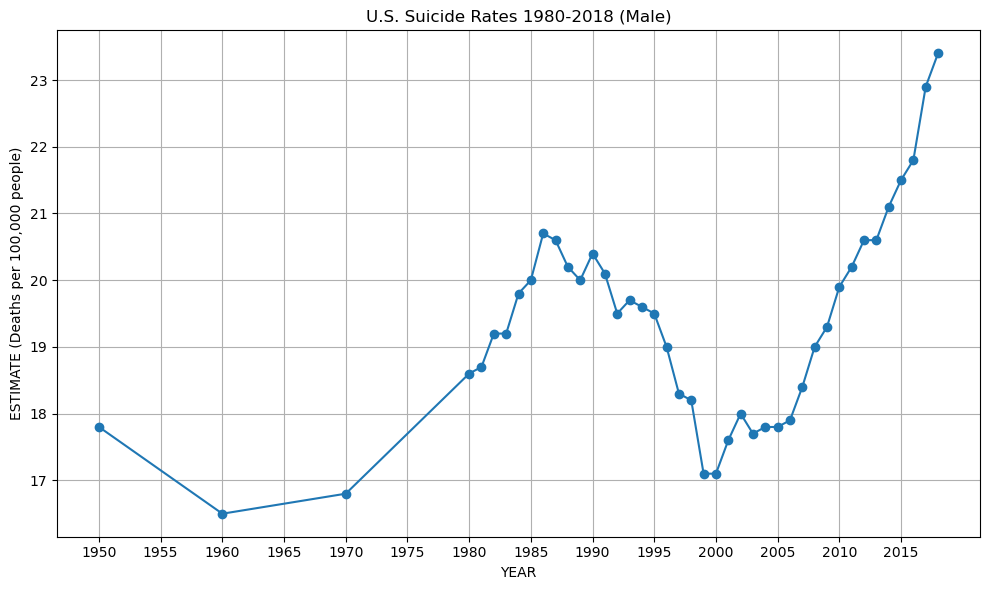

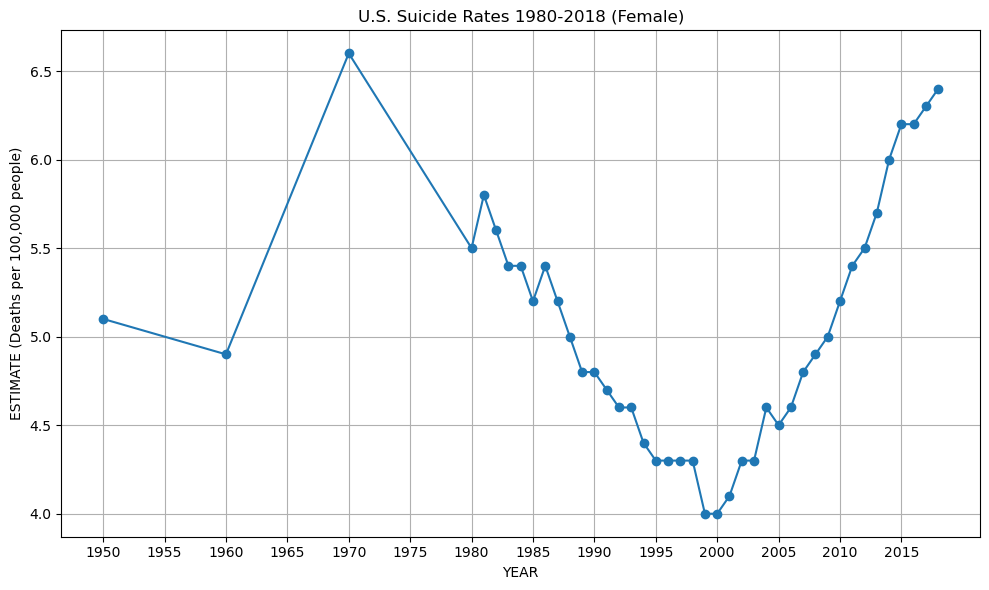

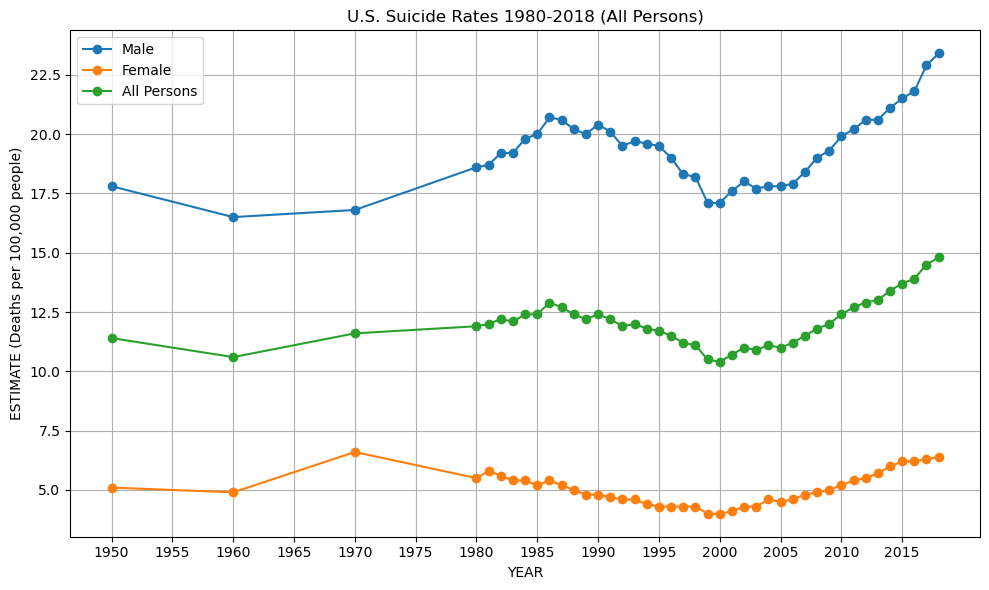

In [25]:
male_data = data[data['STUB_LABEL'] == 'Male'].copy()

male_data.sort_values(by='YEAR', inplace=True)

female_data = data[data['STUB_LABEL'] == 'Female'].copy()

female_data.sort_values(by='YEAR', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(male_data['YEAR'], male_data['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (Male)')

plt.xticks(range(min(male_data['YEAR']),max(male_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(female_data['YEAR'], female_data['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (Female)')

plt.xticks(range(min(female_data['YEAR']),max(female_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(male_data['YEAR'], male_data['ESTIMATE'], marker='o', label='Male')
plt.plot(female_data['YEAR'], female_data['ESTIMATE'], marker='o', label='Female')
plt.plot(all_persons_data['YEAR'], all_persons_data['ESTIMATE'], marker='o', label='All Persons')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (All Persons)')

plt.xticks(range(min(all_persons_data['YEAR']),max(all_persons_data['YEAR']) + 1, 5))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

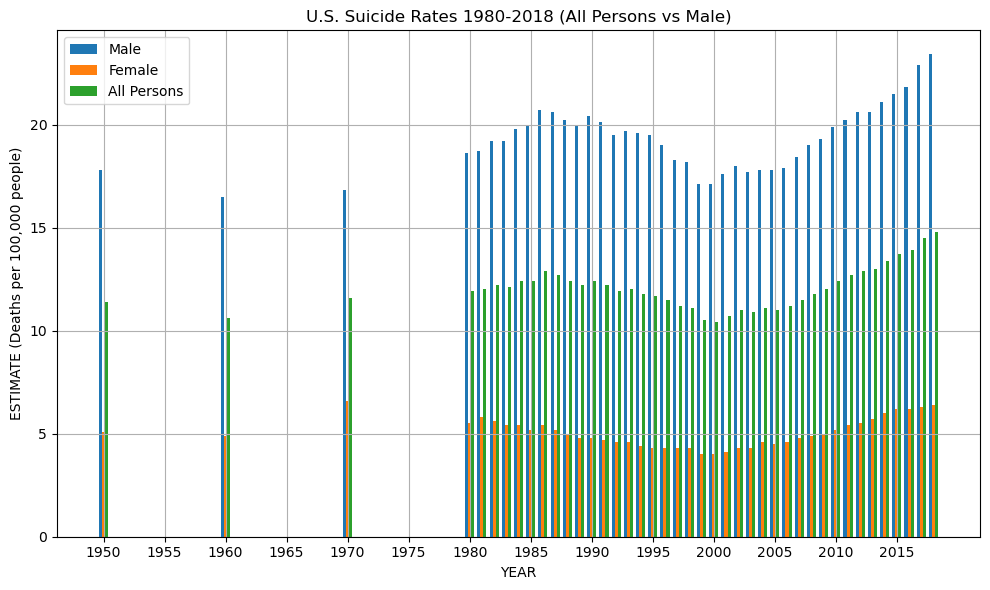

In [26]:
bar_width = .25

bar_positions_male = male_data['YEAR'].values - bar_width
bar_positions_female = female_data['YEAR'].values
bar_positions_all = all_persons_data['YEAR'].values + bar_width

plt.figure(figsize=(10,6))
plt.bar(bar_positions_male, male_data['ESTIMATE'], width=bar_width, label='Male')
plt.bar(bar_positions_female, female_data['ESTIMATE'], width=bar_width, label='Female')
plt.bar(bar_positions_all, all_persons_data['ESTIMATE'], width=bar_width, label='All Persons')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (All Persons vs Male)')

plt.xticks(range(min(all_persons_data['YEAR']),max(all_persons_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
'''
As you can see in the above plots, there is a very clear divide in the suicide rates of men compared to women. On
one side of the coin, men have an exceedingly high suicide rate, averaging consistently around 20 people per 
100,000. On the other hand, women seem to fall fairly under the rate set by the general "all persons" group, as
their suicide rates seem to hover around 5 people per 100,000. The change in rate also seems to be more volatile 
with men as compared to women. 
'''

In [ ]:
'''
One more category in which we are also going to check suicide rates is rates based on race. We will specifically be
comparing White, African American, Asian and Pacific Islander, and Hispanic rates.
'''

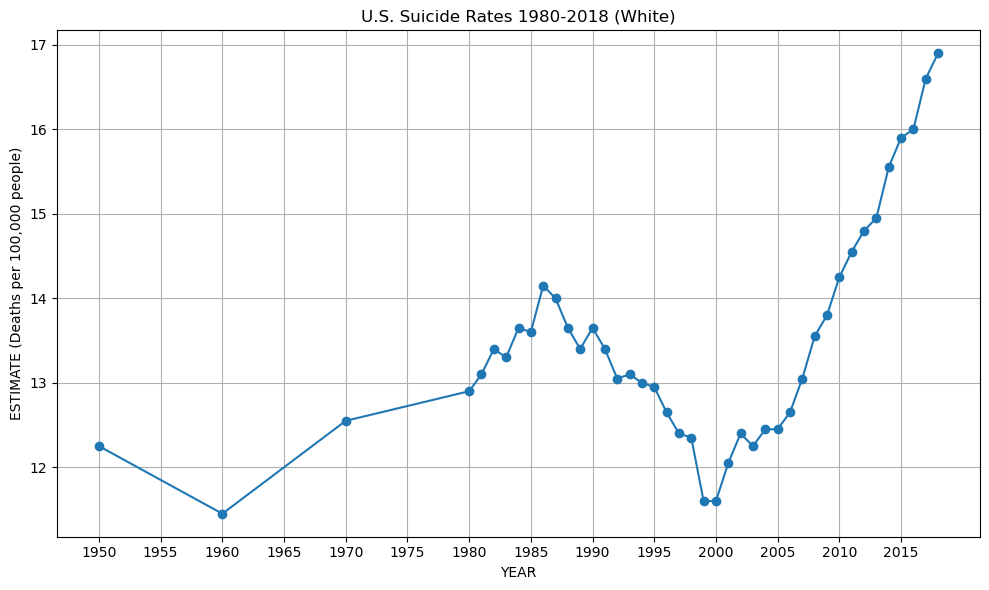

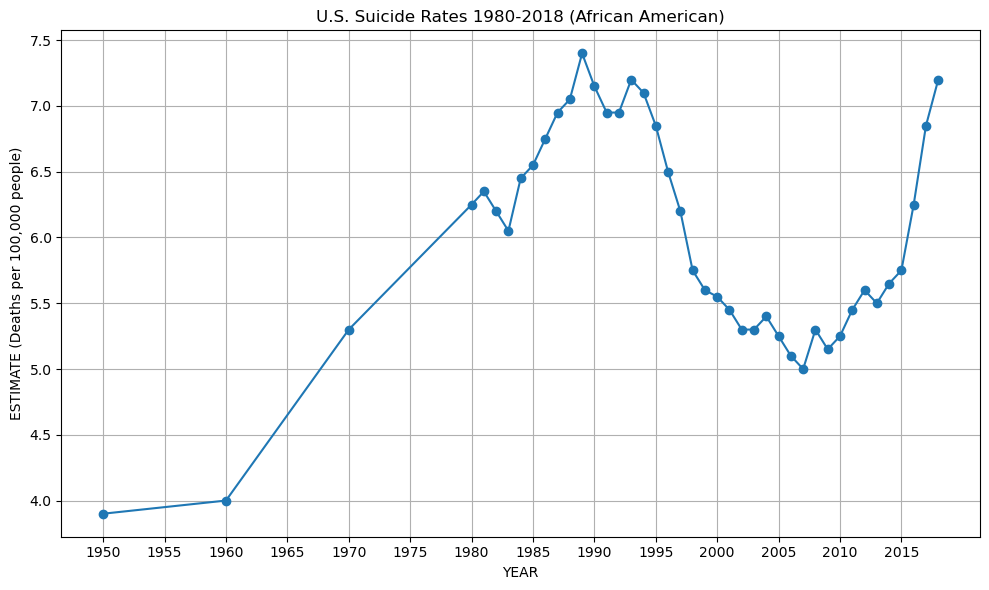

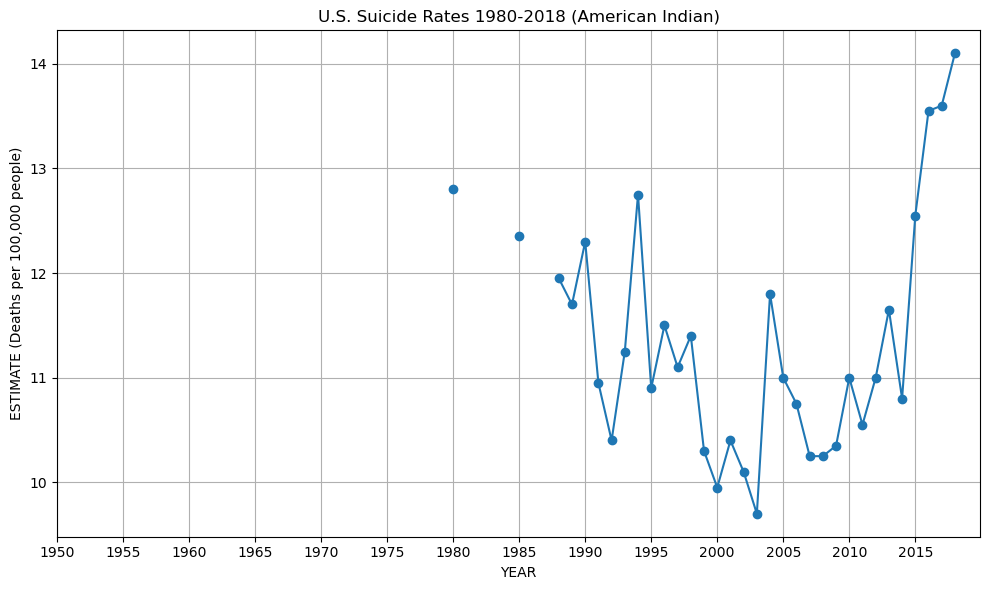

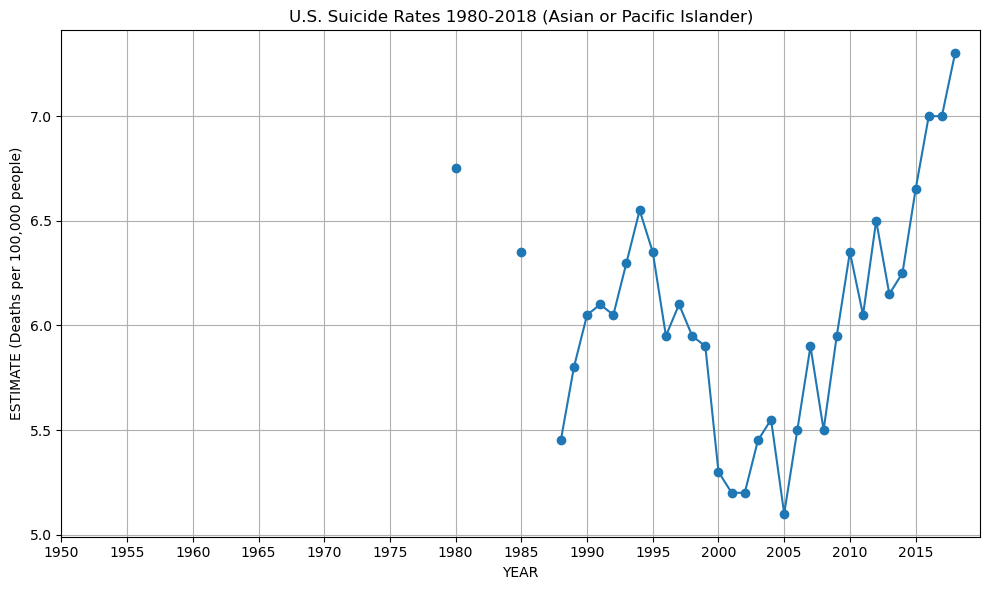

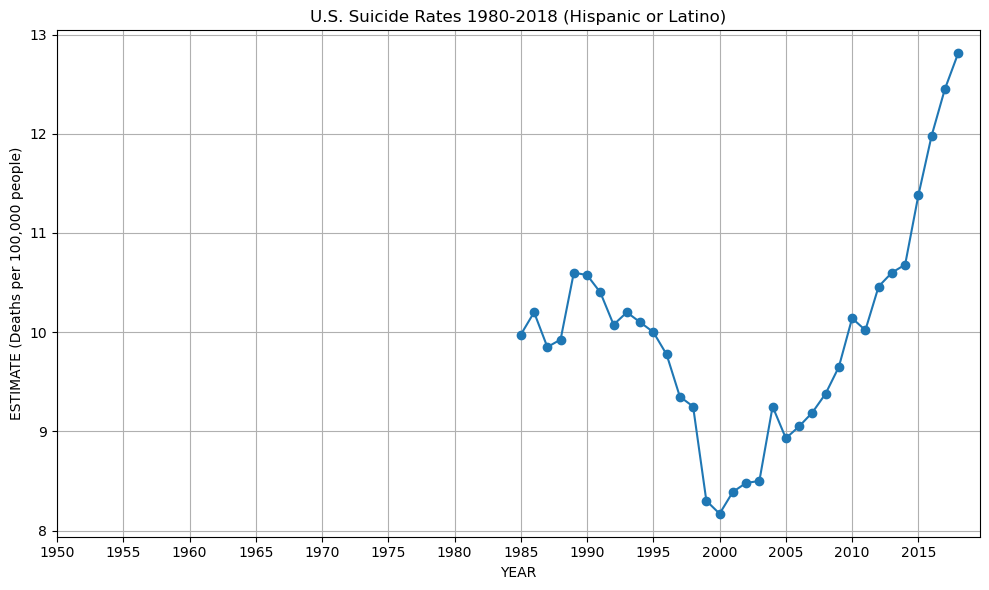

In [27]:
white_data = data[(data['STUB_LABEL'].str.contains('White')) & (data['STUB_NAME'] == 'Sex and race')].copy()

white_data_avg = white_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()
white_data_avg.sort_values(by='YEAR', inplace=True)

aa_data = data[(data['STUB_LABEL'].str.contains('Black')) & (data['STUB_NAME'] == 'Sex and race')].copy()

aa_data_avg = aa_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()
aa_data_avg.sort_values(by='YEAR', inplace=True)

ai_data = data[(data['STUB_LABEL'].str.contains('Indian')) & (data['STUB_NAME'] == 'Sex and race')].copy()

ai_data_avg = ai_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()
ai_data_avg.sort_values(by='YEAR', inplace=True)

ap_data = data[(data['STUB_LABEL'].str.contains('Asian')) & (data['STUB_NAME'] == 'Sex and race')].copy()

ap_data_avg = ap_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()
ap_data_avg.sort_values(by='YEAR', inplace=True)

hl_data = data[(data['STUB_LABEL'].str.contains('Hispanic')) & (data['STUB_NAME'] == 'Sex and race and Hispanic origin')].copy()

hl_data_avg = hl_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()
hl_data_avg.sort_values(by='YEAR', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(white_data_avg['YEAR'], white_data_avg['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (White)')

plt.xticks(range(min(white_data_avg['YEAR']),max(white_data_avg['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(aa_data_avg['YEAR'], aa_data_avg['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (African American)')

plt.xticks(range(min(aa_data_avg['YEAR']),max(aa_data_avg['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(ai_data_avg['YEAR'], ai_data_avg['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (American Indian)')

plt.xticks(range(min(ai_data_avg['YEAR']),max(ai_data_avg['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(ap_data_avg['YEAR'], ap_data_avg['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (Asian or Pacific Islander)')

plt.xticks(range(min(ap_data_avg['YEAR']),max(ap_data_avg['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(hl_data_avg['YEAR'], hl_data_avg['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (Hispanic or Latino)')

plt.xticks(range(min(hl_data_avg['YEAR']),max(hl_data_avg['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
'''
Uh-oh, it looks like we have some missing data value for the American Indian, Asian and Pacific Islanders, and 
Hispanic data sets. We know that what's missing is the 'ESTIMATE' values for the specific years. To obtain the
missing values, we will use SKLearn's KNNImputer on the specified sets to find the missing data points based on 
the nearest neighbors. What gave us the best outputs were having the nearest neighbor's at 5, 3, and 5 respectively
and using uniform weight.
'''

In [ ]:
# It looks like we're missing some data. Let' use K's Nearest Neighbor Algorithm, a machine learning algorithm, to fill in some of the missing information.
def KNNMissing(i, dataset):
    data_missing = dataset[dataset['ESTIMATE'].isnull()].copy()
    data_complete = dataset[~dataset['ESTIMATE'].isnull()].copy()

    data_complete_feat = data_complete[['YEAR', 'ESTIMATE', 'STUB_LABEL_NUM']].values
    data_missing_feat = data_missing[['YEAR', 'ESTIMATE', 'STUB_LABEL_NUM']].values

    imputer = KNNImputer(n_neighbors=i, weights="uniform")
    imputer.fit(data_complete_feat)
    data_missing_imputed = imputer.transform(data_missing_feat)

    data_missing[['YEAR', 'ESTIMATE', 'STUB_LABEL_NUM']] = data_missing_imputed

    data_imputed = pd.concat([data_complete, data_missing])
    
    return data_imputed

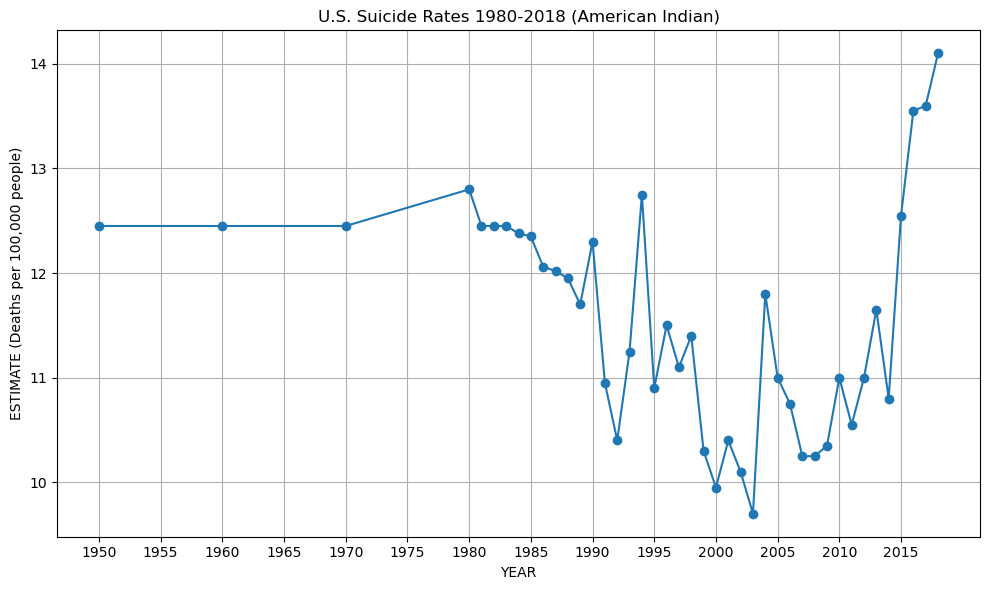

In [9]:
from sklearn.impute import KNNImputer

ai_data = data[(data['STUB_LABEL'].str.contains('Indian')) & (data['STUB_NAME'] == 'Sex and race')].copy()
ai_data = KNNMissing(5, ai_data)

ai_data_avg = ai_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()
ai_data_avg.sort_values(by='YEAR', inplace=True)
ai_data_avg['YEAR'] = ai_data_avg['YEAR'].astype(int)

plt.figure(figsize=(10,6))
plt.plot(ai_data_avg['YEAR'], ai_data_avg['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (American Indian)')

plt.xticks(range(min(ai_data_avg['YEAR']),max(ai_data_avg['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

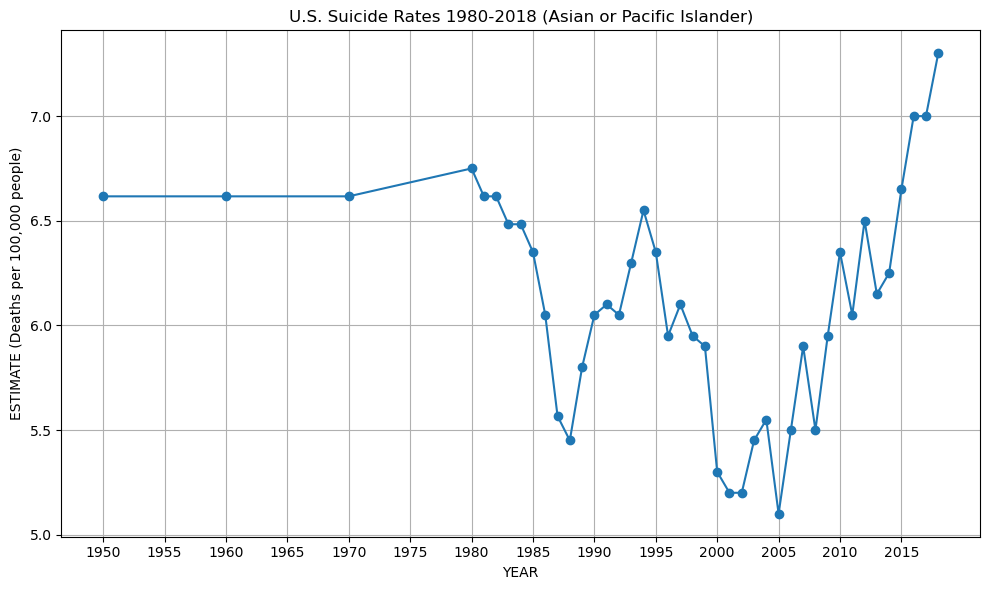

In [28]:
ap_data = data[(data['STUB_LABEL'].str.contains('Asian')) & (data['STUB_NAME'] == 'Sex and race')].copy()
ap_data = KNNMissing(3, ap_data)

ap_data_avg = ap_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()
ap_data_avg.sort_values(by='YEAR', inplace=True)
ap_data_avg['YEAR'] = ap_data_avg['YEAR'].astype(int)

plt.figure(figsize=(10,6))
plt.plot(ap_data_avg['YEAR'], ap_data_avg['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (Asian or Pacific Islander)')

plt.xticks(range(min(ap_data_avg['YEAR']),max(ap_data_avg['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

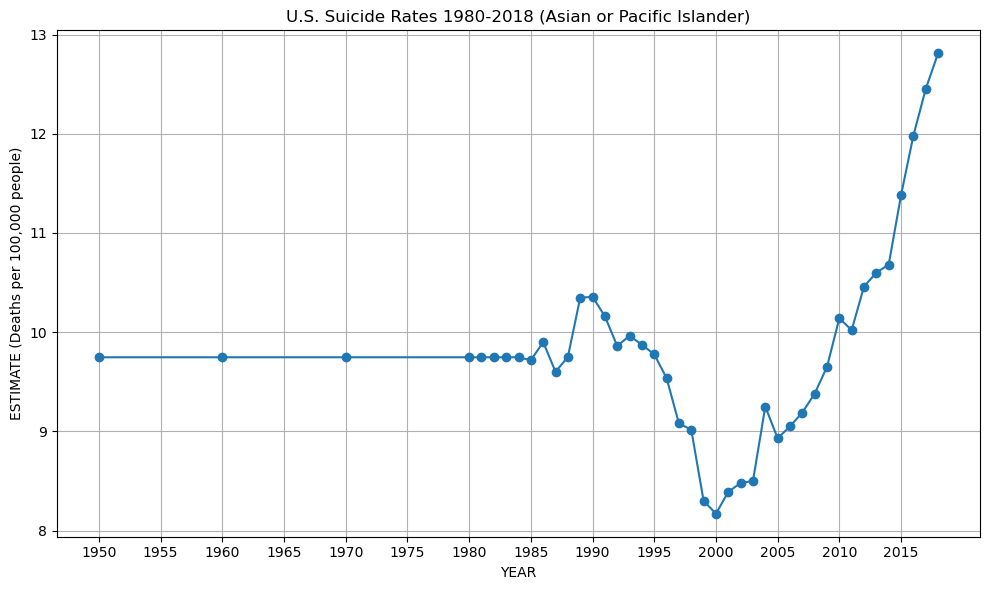

In [11]:
hl_data = data[(data['STUB_LABEL'].str.contains('Hispanic')) & (data['STUB_NAME'] == 'Sex and race and Hispanic origin')].copy()
hl_data = KNNMissing(5, hl_data)

hl_data_avg = hl_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()
hl_data_avg.sort_values(by='YEAR', inplace=True)
hl_data_avg['YEAR'] = hl_data_avg['YEAR'].astype(int)

plt.figure(figsize=(10,6))
plt.plot(hl_data_avg['YEAR'], hl_data_avg['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1980-2018 (Asian or Pacific Islander)')

plt.xticks(range(min(hl_data_avg['YEAR']),max(hl_data_avg['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
'''
Now, we will showcase the mean suicide rates for different races
'''

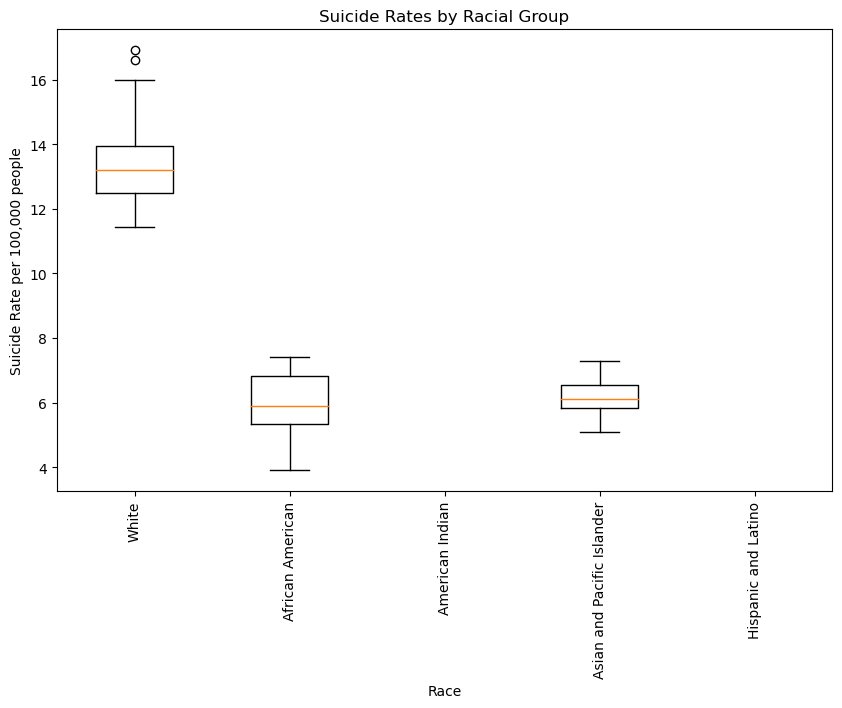

In [29]:
race_data = [white_data_avg, aa_data_avg, ai_data_avg, ap_data_avg, hl_data_avg]

suicide_rates = [curr['ESTIMATE'].values for curr in race_data]

labels = ['White', 'African American', 'American Indian', 'Asian and Pacific Islander', 'Hispanic and Latino']

plt.figure(figsize=(10, 6))
plt.boxplot(suicide_rates, labels=labels)
plt.title('Suicide Rates by Racial Group')
plt.xlabel('Race')
plt.ylabel('Suicide Rate per 100,000 people')
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''
With all the completed data, we can now observe and compare the trends and values of the graphs.

One noticable trend in the data is an apparent drop off in rates going from the start of the 1990's to 2000,
followed by a steep increase from there on. Once again, the reasons The most erratic of the groups in terms of 
trends is the American Indian group, which overall still follows the general trend displayed in the other groups, 
but has noticable jumps throughout the years, specifically in 2005.

As for values, Asian American and Pacific Islanders alongside African Americans had noticably lower suicide rates
than the other groups, perhaps due to cultural differences between the groups.
'''

In [ ]:
'''
After analyzing the suicide rates over time based on various factors, including, sex, age, and race, one main trend
that was seen in all graphs was the slight drop off in rates from 1995 to 2000, followed by a steep increase up
until the present/2018.

Our hypothesis for this trend is that the rate change among every group is either related to political factors,
specifically noticing the change in US war involvement during that time period, or social factors, specifically
referring to the rise of social media and it's effects on the evolution of mental health issues arising from it.
'''

In [ ]:
'''
Model: Analysis, Hypothesis Testing, Machine Learning 

For the Model phase of the Data Lifecycle, we are going to use linear regression in order to obtain a predictive model of our data.
This will allow us to predict values for data outside of our time frame of 2018. 
'''

In [34]:
'''First we are going to prepare the data by selecting our feature adn target variable. For now we will use just the year and age group to make our predictive model.'''
def prepare_data(data):
    # Select features and target variable
    features = ['YEAR', 'AGE_NUM']
    target = 'ESTIMATE'
    
    # Create the feature matrix (X) and target vector (y)
    X = data[features]
    y = data[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test


'''Now we want to train the model so it can learn and recognize any patterns to use for the predictive model.'''
def train_model(X_train, y_train):
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    return model

'''We want to Evaluate the model by testing it. We will use the Mean Squared Error '''
def evaluate_model(model, X_test, y_test):
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

'''Now that we have trained and evaluated our model, we are ready to make predictions and plot our prediction.'''
def make_predictions(model, year, age_groups):
    new_data = pd.DataFrame({
        'YEAR': [year] * len(age_groups),
        'AGE_NUM': age_groups
    })
    predictions = model.predict(new_data)
    new_data['PREDICTED_ESTIMATE'] = predictions
    
    return new_data

Men - Mean Squared Error: 131.92798599763034, R^2 Score: 0.19795252477705583
Women - Mean Squared Error: 7.34782200167876, R^2 Score: 0.023026350908378457
Predictions for Men in 2020:
    YEAR  AGE_NUM  PREDICTED_ESTIMATE
0   2020      0.0           10.846792
1   2020      1.0           13.906094
2   2020      2.0           16.965396
3   2020      2.1           17.271327
4   2020      2.2           17.577257
5   2020      3.0           20.024699
6   2020      3.1           20.330629
7   2020      3.2           20.636559
8   2020      4.0           23.084001
9   2020      4.1           23.389931
10  2020      4.2           23.695862
11  2020      5.0           26.143304
12  2020      5.1           26.449234
13  2020      5.2           26.755164
14  2020      6.0           29.202606
Predictions for Women in 2020:
    YEAR  AGE_NUM  PREDICTED_ESTIMATE
0   2020      0.0            4.183298
1   2020      1.0            4.497105
2   2020      2.0            4.810913
3   2020      2.1        

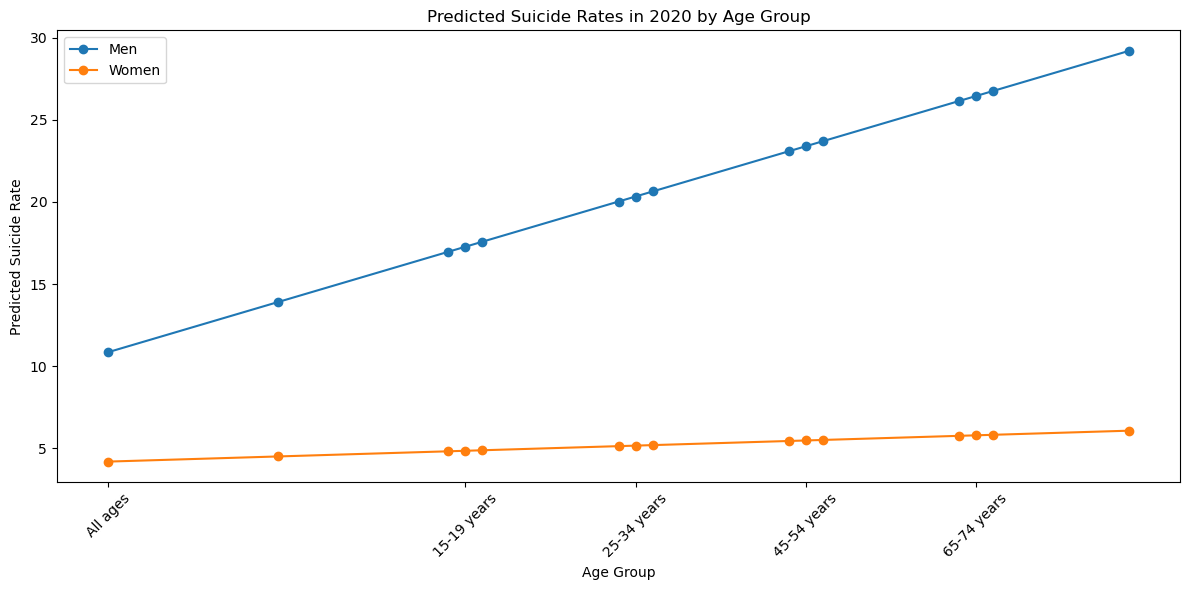

In [40]:
# Create a dictionary to map AGE_NUM to AGE
age_mapping = data[['AGE', 'AGE_NUM']].drop_duplicates().set_index('AGE_NUM').to_dict()['AGE']

# Prepare data for men and women
X_train_men, X_test_men, y_train_men, y_test_men = prepare_data(men_data)
X_train_women, X_test_women, y_train_women, y_test_women = prepare_data(women_data)

# Train models for men and women
model_men = train_model(X_train_men, y_train_men)
model_women = train_model(X_train_women, y_train_women)

# Evaluate models
mse_men, r2_men = evaluate_model(model_men, X_test_men, y_test_men)
mse_women, r2_women = evaluate_model(model_women, X_test_women, y_test_women)

print(f"Men - Mean Squared Error: {mse_men}, R^2 Score: {r2_men}")
print(f"Women - Mean Squared Error: {mse_women}, R^2 Score: {r2_women}")

# Make predictions for 2020 for all age groups
age_groups = men_data['AGE_NUM'].unique()
predictions_men_2020 = make_predictions(model_men, 2020, age_groups)
predictions_women_2020 = make_predictions(model_women, 2020, age_groups)

print("Predictions for Men in 2020:")
print(predictions_men_2020)

print("Predictions for Women in 2020:")
print(predictions_women_2020)

'''Plotting the Predictive Graphs'''

# Choose every nth label to display
n = 3  # Change this value to adjust the spacing of labels
selected_labels_indices = range(0, len(age_labels), n)
selected_age_labels = [age_labels[i] for i in selected_labels_indices]
selected_age_nums = [predictions_men_2020['AGE_NUM'].iloc[i] for i in selected_labels_indices]

# Plot the results with age group labels
plt.figure(figsize=(12, 6))
plt.plot(predictions_men_2020['AGE_NUM'], predictions_men_2020['PREDICTED_ESTIMATE'], label='Men', marker='o')
plt.plot(predictions_women_2020['AGE_NUM'], predictions_women_2020['PREDICTED_ESTIMATE'], label='Women', marker='o')

# Map AGE_NUM to AGE labels for x-axis
age_labels = [age_mapping[age_num] for age_num in predictions_men_2020['AGE_NUM']]

# Select a subset of labels to display
n = 3  # Change this value to adjust the spacing of labels
selected_labels_indices = range(0, len(age_labels), n)
selected_age_labels = [age_labels[i] for i in selected_labels_indices]
selected_age_nums = [predictions_men_2020['AGE_NUM'].iloc[i] for i in selected_labels_indices]

plt.xticks(selected_age_nums, selected_age_labels, rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Predicted Suicide Rate')
plt.title('Predicted Suicide Rates in 2020 by Age Group')
plt.legend()
plt.tight_layout()
plt.show()



In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")
data.drop(data[(data['UNIT_NUM'] == 0) | (data['UNIT_NUM'] == 1) | (data['YEAR'] < 1950)].index, inplace=True)
data.drop(['INDICATOR', 'FLAG', 'UNIT', 'STUB_NAME_NUM', 'YEAR_NUM', 'UNIT_NUM'], axis=1, inplace=True)

# Add a numerical column for SEX (1 for Male, 0 for Female)
data['SEX_NUM'] = data['STUB_LABEL'].apply(lambda x: 1 if 'Male' in x else (0 if 'Female' in x else np.nan))
data.dropna(subset=['SEX_NUM'], inplace=True)  # Drop rows where sex is not properly labeled

# Function to prepare data
def prepare_data(df):
    X = df[['YEAR', 'AGE_NUM']]
    y = df['ESTIMATE']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to predict future values
def predict_future(model, years, age_groups):
    future_data = pd.DataFrame([(year, age) for year in years for age in age_groups], columns=['YEAR', 'AGE_NUM'])
    future_data['PREDICTED_ESTIMATE'] = model.predict(future_data)
    return future_data

# Prepare and train models for men and women
men_data = data[data['SEX_NUM'] == 1]
women_data = data[data['SEX_NUM'] == 0]

X_train_men, X_test_men, y_train_men, y_test_men = prepare_data(men_data)
X_train_women, X_test_women, y_train_women, y_test_women = prepare_data(women_data)

model_men = train_model(X_train_men, y_train_men)
model_women = train_model(X_train_women, y_train_women)

# Predict for years 2019-2029
future_years = np.arange(2019, 2030)
age_groups = data['AGE_NUM'].unique()

predictions_men = predict_future(model_men, future_years, age_groups)
predictions_women = predict_future(model_women, future_years, age_groups)

# Plot the results with age group labels
age_mapping = data[['AGE', 'AGE_NUM']].drop_duplicates().set_index('AGE_NUM').to_dict()['AGE']
age_labels = [age_mapping[age_num] for age_num in age_groups]

plt.figure(figsize=(14, 8))
for age_num in age_groups:
    age_label = age_mapping[age_num]
    plt.plot(predictions_men[predictions_men['AGE_NUM'] == age_num]['YEAR'],
             predictions_men[predictions_men['AGE_NUM'] == age_num]['PREDICTED_ESTIMATE'], label=f'Men {age_label}', marker='o')
    plt.plot(predictions_women[predictions_women['AGE_NUM'] == age_num]['YEAR'],
             predictions_women[predictions_women['AGE_NUM'] == age_num]['PREDICTED_ESTIMATE'], label=f'Women {age_label}', marker='x')

plt.xticks(ticks=future_years)
plt.xlabel('Year')
plt.ylabel('Predicted Suicide Rate')
plt.title('Predicted Suicide Rates from 2019 to 2029 by Age Group and Sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ValueError: Input y contains NaN.

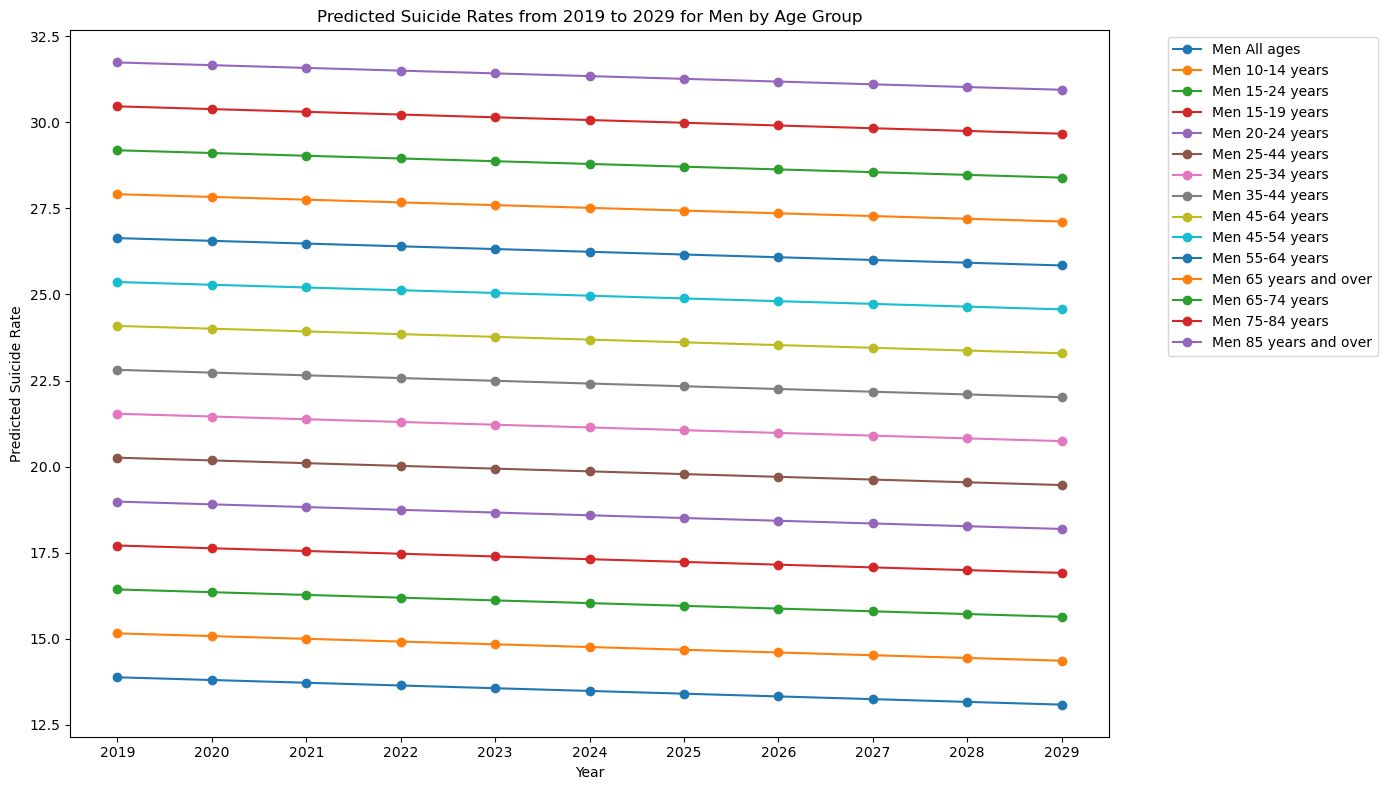

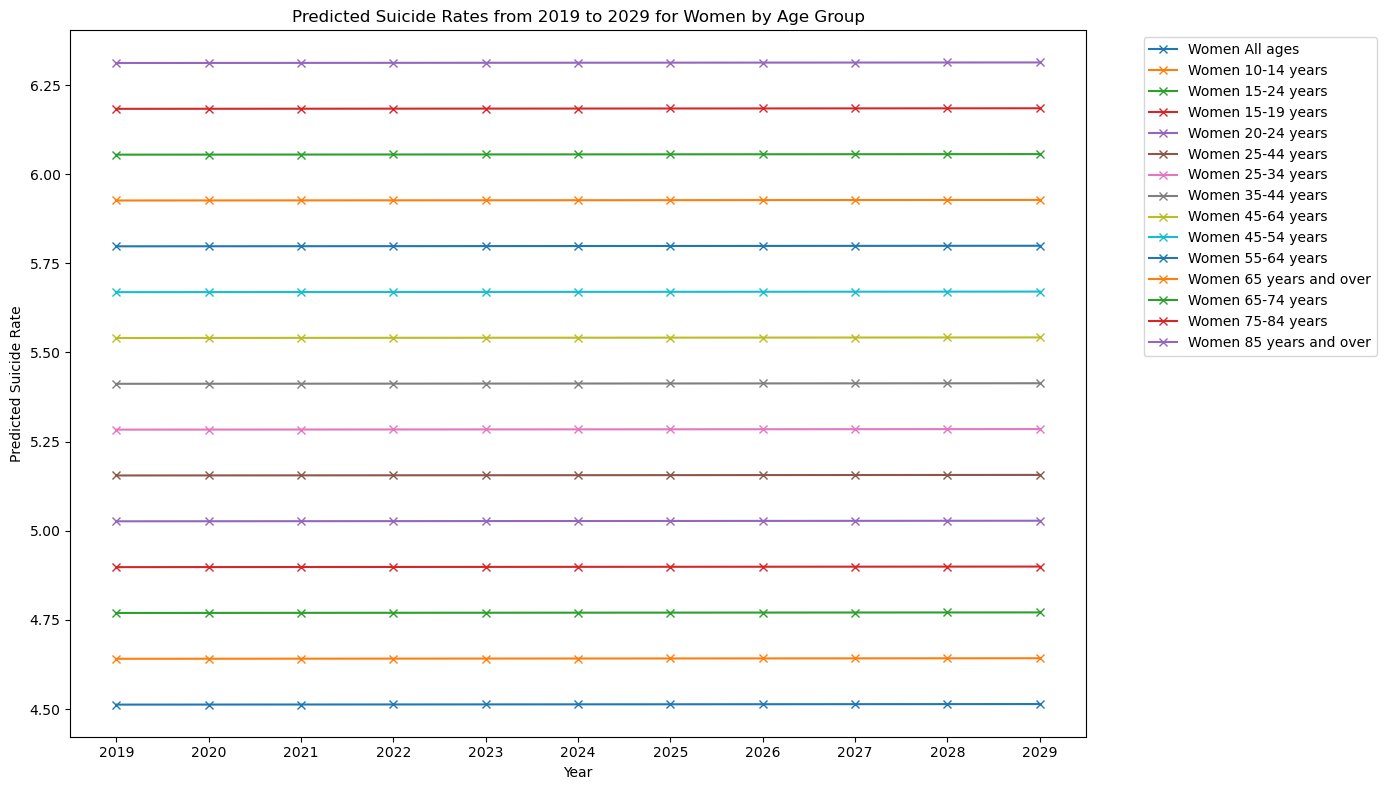

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")
data.drop(data[(data['UNIT_NUM'] == 0) | (data['UNIT_NUM'] == 1) | (data['YEAR'] < 1950)].index, inplace=True)
data.drop(['INDICATOR', 'FLAG', 'UNIT', 'STUB_NAME_NUM', 'YEAR_NUM', 'UNIT_NUM'], axis=1, inplace=True)

# Add a numerical column for SEX (1 for Male, 0 for Female)
data['SEX_NUM'] = data['STUB_LABEL'].apply(lambda x: 1 if 'Male' in x else (0 if 'Female' in x else np.nan))
data.dropna(subset=['SEX_NUM'], inplace=True)  # Drop rows where sex is not properly labeled

# Convert AGE to numerical labels
age_mapping = {age: idx for idx, age in enumerate(data['AGE'].unique())}
data['AGE_NUM'] = data['AGE'].map(age_mapping)

# Function to prepare data
def prepare_data(df):
    df = df.dropna(subset=['ESTIMATE'])  # Drop rows where the target variable is NaN
    df.loc[:, 'AGE_NUM'] = df['AGE_NUM'] - 1  # Adjust age group numbers to match the mapping
    X = df[['YEAR', 'AGE_NUM']]
    y = df['ESTIMATE']
    return train_test_split(X, y, test_size=0.2, random_state=42)


# Function to train the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to predict future values
def predict_future(model, years, age_groups):
    future_data = pd.DataFrame([(year, age) for year in years for age in age_groups], columns=['YEAR', 'AGE_NUM'])
    future_data['PREDICTED_ESTIMATE'] = model.predict(future_data)
    return future_data

# Prepare and train models for men and women
men_data = data[data['SEX_NUM'] == 1]
women_data = data[data['SEX_NUM'] == 0]

X_train_men, X_test_men, y_train_men, y_test_men = prepare_data(men_data)
X_train_women, X_test_women, y_train_women, y_test_women = prepare_data(women_data)

model_men = train_model(X_train_men, y_train_men)
model_women = train_model(X_train_women, y_train_women)

# Predict for years 2019-2029
future_years = np.arange(2019, 2030)
age_groups = data['AGE_NUM'].unique()

predictions_men = predict_future(model_men, future_years, age_groups)
predictions_women = predict_future(model_women, future_years, age_groups)

# Plot the results with age group labels for men
plt.figure(figsize=(14, 8))
for age_group in men_data['AGE'].unique():
    plt.plot(predictions_men[predictions_men['AGE_NUM'] == age_mapping[age_group]]['YEAR'],
             predictions_men[predictions_men['AGE_NUM'] == age_mapping[age_group]]['PREDICTED_ESTIMATE'], label=f'Men {age_group}', marker='o')

plt.xticks(ticks=future_years)
plt.xlabel('Year')
plt.ylabel('Predicted Suicide Rate')
plt.title('Predicted Suicide Rates from 2019 to 2029 for Men by Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the results with age group labels for women
plt.figure(figsize=(14, 8))
for age_group in women_data['AGE'].unique():
    plt.plot(predictions_women[predictions_women['AGE_NUM'] == age_mapping[age_group]]['YEAR'],
             predictions_women[predictions_women['AGE_NUM'] == age_mapping[age_group]]['PREDICTED_ESTIMATE'], label=f'Women {age_group}', marker='x')

plt.xticks(ticks=future_years)
plt.xlabel('Year')
plt.ylabel('Predicted Suicide Rate')
plt.title('Predicted Suicide Rates from 2019 to 2029 for Women by Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Jaime\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


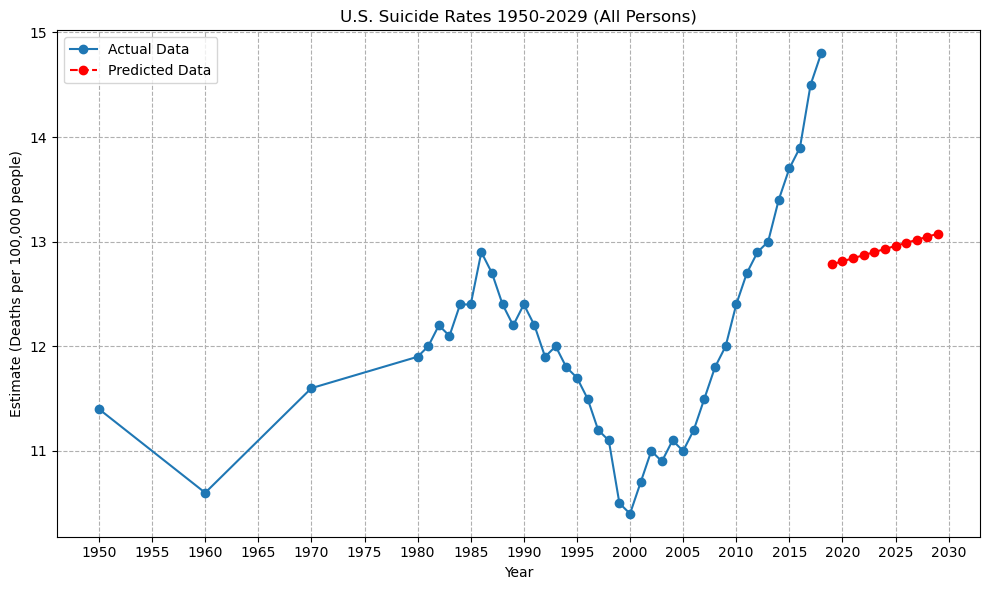

In [64]:
# Remove rows with NaN values in the 'ESTIMATE' column
all_persons_data.dropna(subset=['ESTIMATE'], inplace=True)

# Prepare data for linear regression
X = all_persons_data[['YEAR']]
y = all_persons_data['ESTIMATE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the years 2019 to 2029
future_years = np.arange(2019, 2030).reshape(-1, 1)
predicted_estimates = model.predict(future_years)

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(all_persons_data['YEAR'], all_persons_data['ESTIMATE'], marker='o', label='Actual Data')
plt.plot(future_years, predicted_estimates, marker='o', linestyle='--', color='red', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Estimate (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1950-2029 (All Persons)')
plt.xticks(range(min(all_persons_data['YEAR']), max(future_years.ravel()) + 2, 5))  # Adjust xticks for future years
plt.grid(True, linestyle='--')  # Add grid with dashed lines
plt.legend()
plt.tight_layout()
plt.show()


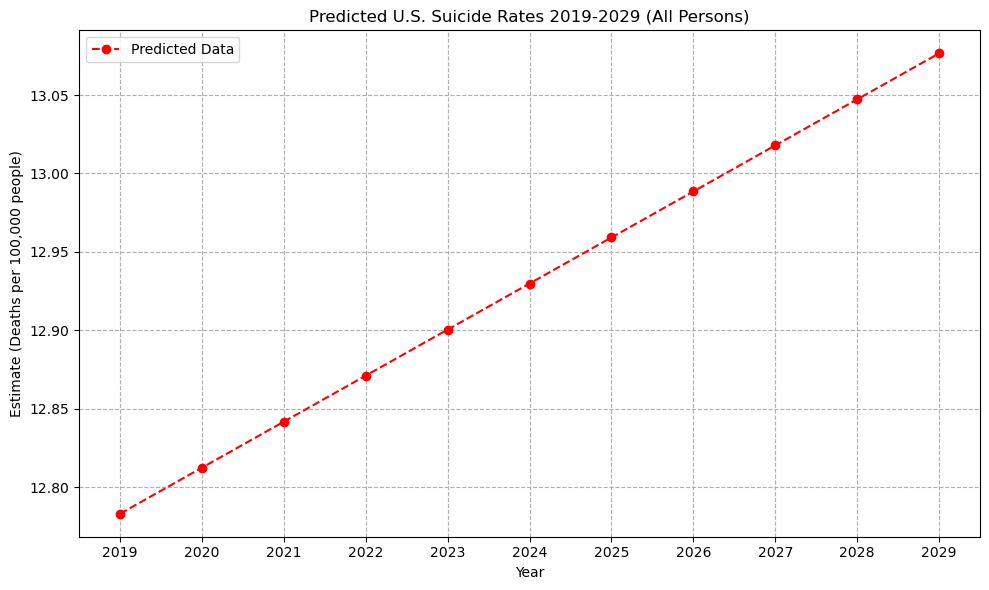

In [65]:
# Visualize the predicted data only
plt.figure(figsize=(10, 6))
plt.plot(future_years, predicted_estimates, marker='o', linestyle='--', color='red', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Estimate (Deaths per 100,000 people)')
plt.title('Predicted U.S. Suicide Rates 2019-2029 (All Persons)')
plt.xticks(range(min(future_years.ravel()), max(future_years.ravel()) + 1, 1))  # Adjust xticks for future years
plt.grid(True, linestyle='--')  # Add grid with dashed lines
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor


# Extract necessary features and target variable
X = data[['YEAR', 'STUB_LABEL', 'STUB_LABEL_NUM', 'AGE']]  # Include age groups as a feature
y = data['ESTIMATE']

# Encode categorical features using one-hot encoding
categorical_features = ['STUB_LABEL', 'AGE']  # Include age groups in categorical features
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_encoded = transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for the years 2019-2029
future_years = np.arange(2019, 2030).reshape(-1, 1)  # Years 2019-2029
sex_age_race_combinations = X[['STUB_LABEL', 'STUB_LABEL_NUM', 'AGE']].drop_duplicates()
X_future = np.hstack((np.repeat(future_years, len(sex_age_race_combinations), axis=0), np.tile(sex_age_race_combinations.values, (len(future_years), 1))))
predicted_estimates = model.predict(X_future)

# Separate predictions for male and female
male_predictions = predicted_estimates[X_future[:, 1] == 'Male']
female_predictions = predicted_estimates[X_future[:, 1] == 'Female']


ValueError: could not convert string to float: 'All persons'